<a href="https://colab.research.google.com/github/MayerT1/Confusion_Matrix_Colab/blob/master/Subset_Data_Evaluation_BoxPlots_4_23_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [0]:
%cd /content/notebooks/
!ls

In [3]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import KFold

from scipy import interp

from google.colab import files

import seaborn as sns


import pandas as pd
from pandas import DataFrame

import numpy as np
from numpy import random


#from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Copy dataset to 10 randomized subsets

In [4]:
df = pd.read_csv('Sample_Points_CSV_all_pts_4_10.csv')
display(df)
header = ['system:index',	'Date_str', 	'WaterPlane',	'bmaxGeeGrd',	'bmaxSnapRtc',	'edgeGeeGrd',	'edgeSnapRtc',	'latitude_209564535',	'longitude_209564535',	'.geo']

df_title = pd.DataFrame(df, columns=header)
##
df_1 = df_title.copy()
df_2 = df_title.copy()
df_3 = df_title.copy()
df_4 = df_title.copy()
df_5 = df_title.copy()
df_6 = df_title.copy()
df_7 = df_title.copy()
df_8 = df_title.copy()
df_9 = df_title.copy()
df_10 = df_title.copy()
##
mydataset_1 = df_1.sample(frac =.7)
mydataset_2 = df_2.sample(frac =.7)
mydataset_3 = df_3.sample(frac =.7)
mydataset_4 = df_4.sample(frac =.7)
mydataset_5 = df_5.sample(frac =.7)
mydataset_6 = df_6.sample(frac =.7)
mydataset_7 = df_7.sample(frac =.7)
mydataset_8 = df_8.sample(frac =.7)
mydataset_9 = df_9.sample(frac =.7)
mydataset_10 = df_10.sample(frac =.7)
##
actual_1 = mydataset_1['WaterPlane']
actual_2 = mydataset_2['WaterPlane']
actual_3 = mydataset_3['WaterPlane']
actual_4 = mydataset_4['WaterPlane']
actual_5 = mydataset_5['WaterPlane']
actual_6 = mydataset_6['WaterPlane']
actual_7 = mydataset_7['WaterPlane']
actual_8 = mydataset_8['WaterPlane']
actual_9 = mydataset_9['WaterPlane']
actual_10 = mydataset_10['WaterPlane']
##
bmaxGeeGrd_1 = mydataset_1['bmaxGeeGrd']
bmaxGeeGrd_2 = mydataset_2['bmaxGeeGrd']
bmaxGeeGrd_3 = mydataset_3['bmaxGeeGrd']
bmaxGeeGrd_4 = mydataset_4['bmaxGeeGrd']
bmaxGeeGrd_5 = mydataset_5['bmaxGeeGrd']
bmaxGeeGrd_6 = mydataset_6['bmaxGeeGrd']
bmaxGeeGrd_7 = mydataset_7['bmaxGeeGrd']
bmaxGeeGrd_8 = mydataset_8['bmaxGeeGrd']
bmaxGeeGrd_9 = mydataset_9['bmaxGeeGrd']
bmaxGeeGrd_10 = mydataset_10['bmaxGeeGrd']
##
bmaxSnapRtc_1 = mydataset_1['bmaxSnapRtc']
bmaxSnapRtc_2 = mydataset_2['bmaxSnapRtc']
bmaxSnapRtc_3 = mydataset_3['bmaxSnapRtc']
bmaxSnapRtc_4 = mydataset_4['bmaxSnapRtc']
bmaxSnapRtc_5 = mydataset_5['bmaxSnapRtc']
bmaxSnapRtc_6 = mydataset_6['bmaxSnapRtc']
bmaxSnapRtc_7 = mydataset_7['bmaxSnapRtc']
bmaxSnapRtc_8 = mydataset_8['bmaxSnapRtc']
bmaxSnapRtc_9 = mydataset_9['bmaxSnapRtc']
bmaxSnapRtc_10 = mydataset_10['bmaxSnapRtc']
##
edgeGeeGrd_1 = mydataset_1['edgeGeeGrd']
edgeGeeGrd_2 = mydataset_2['edgeGeeGrd']
edgeGeeGrd_3 = mydataset_3['edgeGeeGrd']
edgeGeeGrd_4 = mydataset_4['edgeGeeGrd']
edgeGeeGrd_5 = mydataset_5['edgeGeeGrd']
edgeGeeGrd_6 = mydataset_6['edgeGeeGrd']
edgeGeeGrd_7 = mydataset_7['edgeGeeGrd']
edgeGeeGrd_8 = mydataset_8['edgeGeeGrd']
edgeGeeGrd_9 = mydataset_9['edgeGeeGrd']
edgeGeeGrd_10 = mydataset_10['edgeGeeGrd']
##
edgeSnapRtc_1 = mydataset_1['edgeSnapRtc']
edgeSnapRtc_2 = mydataset_2['edgeSnapRtc']
edgeSnapRtc_3 = mydataset_3['edgeSnapRtc']
edgeSnapRtc_4 = mydataset_4['edgeSnapRtc']
edgeSnapRtc_5 = mydataset_5['edgeSnapRtc']
edgeSnapRtc_6 = mydataset_6['edgeSnapRtc']
edgeSnapRtc_7 = mydataset_7['edgeSnapRtc']
edgeSnapRtc_8 = mydataset_8['edgeSnapRtc']
edgeSnapRtc_9 = mydataset_9['edgeSnapRtc']
edgeSnapRtc_10 = mydataset_10['edgeSnapRtc']




,system:index,Date_str,WaterPlane,bmaxGeeGrd,bmaxSnapRtc,edgeGeeGrd,edgeSnapRtc,latitude_209564535,longitude_209564535,.geo
0,0_1_00000000000000000001_0,2019-05-01,0,1,0,0,0,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,0_1_00000000000000000002_0,2019-05-01,0,0,0,0,0,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,0_1_00000000000000000003_0,2019-05-01,0,1,0,0,0,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,0_1_00000000000000000005_0,2019-05-01,0,1,0,0,0,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,0_1_00000000000000000006_0,2019-05-01,0,0,0,0,0,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...
2899,18_2_00000000000000000376_0,2019-08-05,1,1,1,1,1,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2900,18_2_00000000000000000379_0,2019-08-05,1,1,1,1,1,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2901,18_2_0000000000000000037e_0,2019-08-05,1,1,1,1,1,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2902,18_2_00000000000000000380_0,2019-08-05,1,1,1,1,1,NaN,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


# Kappa_Stats and Figures

In [5]:
bmaxGeeGrd_cohen = [cohen_kappa_score(actual_1, bmaxGeeGrd_1),
           cohen_kappa_score(actual_2, bmaxGeeGrd_2),
           cohen_kappa_score(actual_3, bmaxGeeGrd_3),
           cohen_kappa_score(actual_4, bmaxGeeGrd_4), 
           cohen_kappa_score(actual_5, bmaxGeeGrd_5), 
           cohen_kappa_score(actual_6, bmaxGeeGrd_6), 
           cohen_kappa_score(actual_7, bmaxGeeGrd_7), 
           cohen_kappa_score(actual_8, bmaxGeeGrd_8), 
           cohen_kappa_score(actual_9, bmaxGeeGrd_9), 
           cohen_kappa_score(actual_10, bmaxGeeGrd_10)]

# bmaxGeeGrd_Acc= pd.DataFrame(bmaxGeeGrd_Accuracy)
bmaxGeeGrd_kappa= np.array(bmaxGeeGrd_cohen)
##
bmaxSnapRtc_cohen = [cohen_kappa_score(actual_1, bmaxSnapRtc_1),
           cohen_kappa_score(actual_2, bmaxSnapRtc_2),
           cohen_kappa_score(actual_3, bmaxSnapRtc_3),
           cohen_kappa_score(actual_4, bmaxSnapRtc_4), 
           cohen_kappa_score(actual_5, bmaxSnapRtc_5), 
           cohen_kappa_score(actual_6, bmaxSnapRtc_6), 
           cohen_kappa_score(actual_7, bmaxSnapRtc_7), 
           cohen_kappa_score(actual_8, bmaxSnapRtc_8), 
           cohen_kappa_score(actual_9, bmaxSnapRtc_9), 
           cohen_kappa_score(actual_10, bmaxSnapRtc_10)]

# bmaxSnapRtc_Acc= pd.DataFrame(bmaxSnapRtc_Accuracy)
bmaxSnapRtc_kappa= np.array(bmaxSnapRtc_cohen)
##

edgeGeeGrd_cohen = [cohen_kappa_score(actual_1, edgeGeeGrd_1),
           cohen_kappa_score(actual_2, edgeGeeGrd_2),
           cohen_kappa_score(actual_3, edgeGeeGrd_3),
           cohen_kappa_score(actual_4, edgeGeeGrd_4), 
           cohen_kappa_score(actual_5, edgeGeeGrd_5), 
           cohen_kappa_score(actual_6, edgeGeeGrd_6), 
           cohen_kappa_score(actual_7, edgeGeeGrd_7), 
           cohen_kappa_score(actual_8, edgeGeeGrd_8), 
           cohen_kappa_score(actual_9, edgeGeeGrd_9), 
           cohen_kappa_score(actual_10, edgeGeeGrd_10)]

# edgeGeeGrd_Acc= pd.DataFrame(edgeGeeGrd_Accuracy)
edgeGeeGrd_kappa= np.array(edgeGeeGrd_cohen)
##

edgeSnapRtc_cohen = [cohen_kappa_score(actual_1, edgeSnapRtc_1),
           cohen_kappa_score(actual_2, edgeSnapRtc_2),
           cohen_kappa_score(actual_3, edgeSnapRtc_3),
           cohen_kappa_score(actual_4, edgeSnapRtc_4), 
           cohen_kappa_score(actual_5, edgeSnapRtc_5), 
           cohen_kappa_score(actual_6, edgeSnapRtc_6), 
           cohen_kappa_score(actual_7, edgeSnapRtc_7), 
           cohen_kappa_score(actual_8, edgeSnapRtc_8), 
           cohen_kappa_score(actual_9, edgeSnapRtc_9), 
           cohen_kappa_score(actual_10, edgeSnapRtc_10)]

# edgeSnapRtc_Acc= pd.DataFrame(edgeSnapRtc_Accuracy)
edgeSnapRtc_kappa= np.array(edgeSnapRtc_cohen)
##

head = ["bmaxGeeGrd_Kappa","bmaxSnapRtc_Kappa","edgeGeeGrd_Kappa","edgeSnapRtc_Kappa" ]

Kappa_stack = np.column_stack((bmaxGeeGrd_kappa, bmaxSnapRtc_kappa, edgeGeeGrd_kappa, edgeSnapRtc_kappa)) 
final_Kappa_stack = pd.DataFrame(Kappa_stack, columns=head )
display(final_Kappa_stack)

print("Accuracy mean:", final_Kappa_stack.mean())
print("Accuracy std:", final_Kappa_stack.std())


,bmaxGeeGrd_Kappa,bmaxSnapRtc_Kappa,edgeGeeGrd_Kappa,edgeSnapRtc_Kappa
0,0.776913,0.781599,0.696518,0.822427
1,0.785573,0.798849,0.694534,0.835888
2,0.789836,0.789815,0.713924,0.831453
3,0.809938,0.805294,0.718748,0.856012
4,0.796680,0.781730,0.695452,0.826764
5,0.784852,0.786215,0.676715,0.824697
6,0.776078,0.787587,0.698893,0.824620
7,0.803266,0.799359,0.713813,0.841315
8,0.790725,0.795081,0.701053,0.834859
9,0.792963,0.791658,0.712387,0.829869


Accuracy mean: bmaxGeeGrd_Kappa     0.790682
bmaxSnapRtc_Kappa    0.791719
edgeGeeGrd_Kappa     0.702204
edgeSnapRtc_Kappa    0.832790
dtype: float64
Accuracy std: bmaxGeeGrd_Kappa     0.010719
bmaxSnapRtc_Kappa    0.007874
edgeGeeGrd_Kappa     0.012685
edgeSnapRtc_Kappa    0.010067
dtype: float64


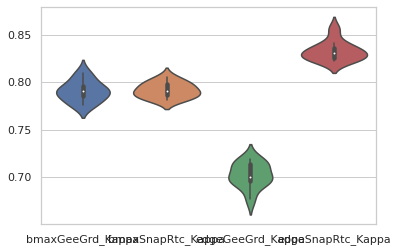

In [6]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.violinplot(data=final_Kappa_stack)

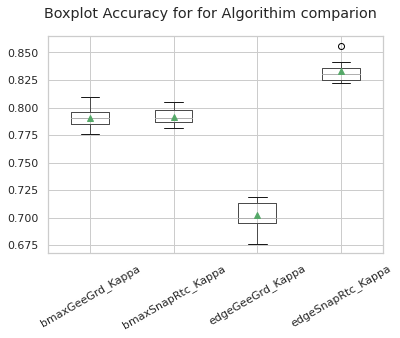

In [7]:
plt.figure()
plt.suptitle("Boxplot Accuracy for for Algorithim comparion")
ax = plt.gca()

final_Kappa_stack.boxplot(showmeans=True)
# Rotate x axis text values
for tick in ax.get_xticklabels():
    tick.set_rotation(30)

# F1_Stats and Figures

In [8]:
bmaxGeeGrd_f1score = [f1_score(actual_1, bmaxGeeGrd_1),
           f1_score(actual_2, bmaxGeeGrd_2),
           f1_score(actual_3, bmaxGeeGrd_3),
           f1_score(actual_4, bmaxGeeGrd_4), 
           f1_score(actual_5, bmaxGeeGrd_5), 
           f1_score(actual_6, bmaxGeeGrd_6), 
           f1_score(actual_7, bmaxGeeGrd_7), 
           f1_score(actual_8, bmaxGeeGrd_8), 
           f1_score(actual_9, bmaxGeeGrd_9), 
           f1_score(actual_10, bmaxGeeGrd_10)]

# bmaxGeeGrd_Acc= pd.DataFrame(bmaxGeeGrd_Accuracy)
bmaxGeeGrd_f1= np.array(bmaxGeeGrd_f1score)
##
bmaxSnapRtc_f1score = [f1_score(actual_1, bmaxSnapRtc_1),
           f1_score(actual_2, bmaxSnapRtc_2),
           f1_score(actual_3, bmaxSnapRtc_3),
           f1_score(actual_4, bmaxSnapRtc_4), 
           f1_score(actual_5, bmaxSnapRtc_5), 
           f1_score(actual_6, bmaxSnapRtc_6), 
           f1_score(actual_7, bmaxSnapRtc_7), 
           f1_score(actual_8, bmaxSnapRtc_8), 
           f1_score(actual_9, bmaxSnapRtc_9), 
           f1_score(actual_10, bmaxSnapRtc_10)]

# bmaxSnapRtc_Acc= pd.DataFrame(bmaxSnapRtc_Accuracy)
bmaxSnapRtc_f1= np.array(bmaxSnapRtc_f1score)
##

edgeGeeGrd_f1score = [f1_score(actual_1, edgeGeeGrd_1),
           f1_score(actual_2, edgeGeeGrd_2),
           f1_score(actual_3, edgeGeeGrd_3),
           f1_score(actual_4, edgeGeeGrd_4), 
           f1_score(actual_5, edgeGeeGrd_5), 
           f1_score(actual_6, edgeGeeGrd_6), 
           f1_score(actual_7, edgeGeeGrd_7), 
           f1_score(actual_8, edgeGeeGrd_8), 
           f1_score(actual_9, edgeGeeGrd_9), 
           f1_score(actual_10, edgeGeeGrd_10)]

# edgeGeeGrd_Acc= pd.DataFrame(edgeGeeGrd_Accuracy)
edgeGeeGrd_f1= np.array(edgeGeeGrd_f1score)
##

edgeSnapRtc_f1score = [f1_score(actual_1, edgeSnapRtc_1),
           f1_score(actual_2, edgeSnapRtc_2),
           f1_score(actual_3, edgeSnapRtc_3),
           f1_score(actual_4, edgeSnapRtc_4), 
           f1_score(actual_5, edgeSnapRtc_5), 
           f1_score(actual_6, edgeSnapRtc_6), 
           f1_score(actual_7, edgeSnapRtc_7), 
           f1_score(actual_8, edgeSnapRtc_8), 
           f1_score(actual_9, edgeSnapRtc_9), 
           f1_score(actual_10, edgeSnapRtc_10)]

# edgeSnapRtc_Acc= pd.DataFrame(edgeSnapRtc_Accuracy)
edgeSnapRtc_f1= np.array(edgeSnapRtc_f1score)
##

head = ["bmaxGeeGrd_F1","bmaxSnapRtc_F1","edgeGeeGrd_F1","edgeSnapRtc_F1" ]

f1_stack = np.column_stack((bmaxGeeGrd_f1, bmaxSnapRtc_f1, edgeGeeGrd_f1, edgeSnapRtc_f1)) 
final_f1_stack = pd.DataFrame(f1_stack, columns=head )
display(final_f1_stack)
print("Accuracy mean:", final_f1_stack.mean())
print("Accuracy std:", final_f1_stack.std())

,bmaxGeeGrd_F1,bmaxSnapRtc_F1,edgeGeeGrd_F1,edgeSnapRtc_F1
0,0.834132,0.836435,0.758140,0.862661
1,0.840385,0.848963,0.756440,0.873118
2,0.844779,0.843720,0.774411,0.870833
3,0.857977,0.853755,0.775558,0.888407
4,0.850511,0.838095,0.759322,0.867016
5,0.840607,0.840156,0.742459,0.864750
6,0.831683,0.838776,0.758123,0.862876
7,0.854442,0.850530,0.773606,0.878151
8,0.846296,0.848197,0.764045,0.873706
9,0.844794,0.842843,0.771028,0.867760


Accuracy mean: bmaxGeeGrd_F1     0.844561
bmaxSnapRtc_F1    0.844147
edgeGeeGrd_F1     0.763313
edgeSnapRtc_F1    0.870928
dtype: float64
Accuracy std: bmaxGeeGrd_F1     0.008325
bmaxSnapRtc_F1    0.005920
edgeGeeGrd_F1     0.010493
edgeSnapRtc_F1    0.007937
dtype: float64


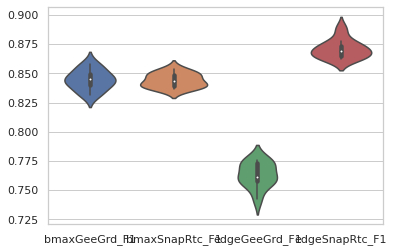

In [9]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.violinplot(data=final_f1_stack)

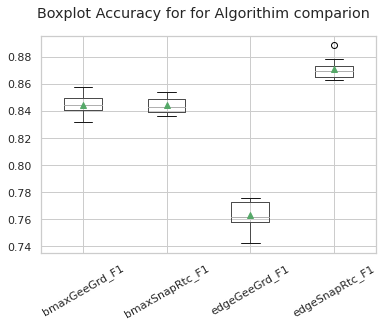

In [10]:
plt.figure()
plt.suptitle("Boxplot Accuracy for for Algorithim comparion")
ax = plt.gca()

final_f1_stack.boxplot(showmeans=True)
# Rotate x axis text values
for tick in ax.get_xticklabels():
    tick.set_rotation(30)

# Accuracy_Stats and Figures

In [11]:
bmaxGeeGrd_Accuracy = [accuracy_score(actual_1, bmaxGeeGrd_1),
           accuracy_score(actual_2, bmaxGeeGrd_2),
           accuracy_score(actual_3, bmaxGeeGrd_3),
           accuracy_score(actual_4, bmaxGeeGrd_4), 
           accuracy_score(actual_5, bmaxGeeGrd_5), 
           accuracy_score(actual_6, bmaxGeeGrd_6), 
           accuracy_score(actual_7, bmaxGeeGrd_7), 
           accuracy_score(actual_8, bmaxGeeGrd_8), 
           accuracy_score(actual_9, bmaxGeeGrd_9), 
           accuracy_score(actual_10, bmaxGeeGrd_10)]

# bmaxGeeGrd_Acc= pd.DataFrame(bmaxGeeGrd_Accuracy)
bmaxGeeGrd_Acc= np.array(bmaxGeeGrd_Accuracy)
##
bmaxSnapRtc_Accuracy = [accuracy_score(actual_1, bmaxSnapRtc_1),
           accuracy_score(actual_2, bmaxSnapRtc_2),
           accuracy_score(actual_3, bmaxSnapRtc_3),
           accuracy_score(actual_4, bmaxSnapRtc_4), 
           accuracy_score(actual_5, bmaxSnapRtc_5), 
           accuracy_score(actual_6, bmaxSnapRtc_6), 
           accuracy_score(actual_7, bmaxSnapRtc_7), 
           accuracy_score(actual_8, bmaxSnapRtc_8), 
           accuracy_score(actual_9, bmaxSnapRtc_9), 
           accuracy_score(actual_10, bmaxSnapRtc_10)]

# bmaxSnapRtc_Acc= pd.DataFrame(bmaxSnapRtc_Accuracy)
bmaxSnapRtc_Acc= np.array(bmaxSnapRtc_Accuracy)
##

edgeGeeGrd_Accuracy = [accuracy_score(actual_1, edgeGeeGrd_1),
           accuracy_score(actual_2, edgeGeeGrd_2),
           accuracy_score(actual_3, edgeGeeGrd_3),
           accuracy_score(actual_4, edgeGeeGrd_4), 
           accuracy_score(actual_5, edgeGeeGrd_5), 
           accuracy_score(actual_6, edgeGeeGrd_6), 
           accuracy_score(actual_7, edgeGeeGrd_7), 
           accuracy_score(actual_8, edgeGeeGrd_8), 
           accuracy_score(actual_9, edgeGeeGrd_9), 
           accuracy_score(actual_10, edgeGeeGrd_10)]

# edgeGeeGrd_Acc= pd.DataFrame(edgeGeeGrd_Accuracy)
edgeGeeGrd_Acc= np.array(edgeGeeGrd_Accuracy)
##

edgeSnapRtc_Accuracy = [accuracy_score(actual_1, edgeSnapRtc_1),
           accuracy_score(actual_2, edgeSnapRtc_2),
           accuracy_score(actual_3, edgeSnapRtc_3),
           accuracy_score(actual_4, edgeSnapRtc_4), 
           accuracy_score(actual_5, edgeSnapRtc_5), 
           accuracy_score(actual_6, edgeSnapRtc_6), 
           accuracy_score(actual_7, edgeSnapRtc_7), 
           accuracy_score(actual_8, edgeSnapRtc_8), 
           accuracy_score(actual_9, edgeSnapRtc_9), 
           accuracy_score(actual_10, edgeSnapRtc_10)]

# edgeSnapRtc_Acc= pd.DataFrame(edgeSnapRtc_Accuracy)
edgeSnapRtc_Acc= np.array(edgeSnapRtc_Accuracy)
##

head = ["bmaxGeeGrd_Accuracy","bmaxSnapRtc_Accuracy","edgeGeeGrd_Accuracy","edgeSnapRtc_Accuracy" ]

acc_stack = np.column_stack((bmaxGeeGrd_Acc, bmaxSnapRtc_Acc, edgeGeeGrd_Acc, edgeSnapRtc_Acc)) 
final_acc_stack = pd.DataFrame(acc_stack, columns=head )
display(final_acc_stack)
print("Accuracy mean:", final_acc_stack.mean())
print("Accuracy std:", final_acc_stack.std())

,bmaxGeeGrd_Accuracy,bmaxSnapRtc_Accuracy,edgeGeeGrd_Accuracy,edgeSnapRtc_Accuracy
0,0.914904,0.917855,0.897688,0.937039
1,0.918347,0.924742,0.897688,0.941958
2,0.918839,0.919823,0.901131,0.939006
3,0.928185,0.927201,0.906050,0.949336
4,0.920807,0.916380,0.895229,0.937531
5,0.917364,0.919331,0.890802,0.937531
6,0.916380,0.922282,0.901131,0.939498
7,0.924250,0.923758,0.902115,0.942941
8,0.918347,0.921299,0.896704,0.939990
9,0.922282,0.922774,0.903591,0.940482


Accuracy mean: bmaxGeeGrd_Accuracy     0.919970
bmaxSnapRtc_Accuracy    0.921545
edgeGeeGrd_Accuracy     0.899213
edgeSnapRtc_Accuracy    0.940531
dtype: float64
Accuracy std: bmaxGeeGrd_Accuracy     0.003996
bmaxSnapRtc_Accuracy    0.003289
edgeGeeGrd_Accuracy     0.004463
edgeSnapRtc_Accuracy    0.003640
dtype: float64


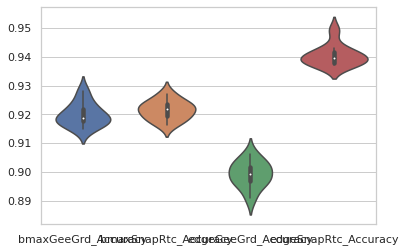

In [12]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.violinplot(data=final_acc_stack)

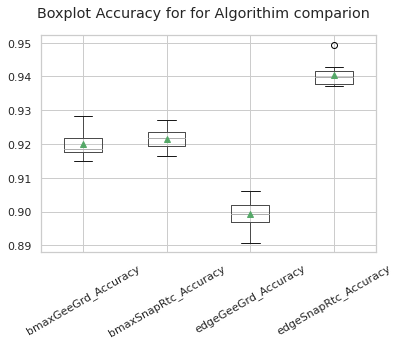

In [13]:
plt.figure()
plt.suptitle("Boxplot Accuracy for for Algorithim comparion")
ax = plt.gca()

final_acc_stack.boxplot(showmeans=True)
# Rotate x axis text values
for tick in ax.get_xticklabels():
    tick.set_rotation(30)

# Precision_Stats and Figures

In [14]:
bmaxGeeGrd_precision = [precision_score(actual_1, bmaxGeeGrd_1),
           precision_score(actual_2, bmaxGeeGrd_2),
           precision_score(actual_3, bmaxGeeGrd_3),
           precision_score(actual_4, bmaxGeeGrd_4), 
           precision_score(actual_5, bmaxGeeGrd_5), 
           precision_score(actual_6, bmaxGeeGrd_6), 
           precision_score(actual_7, bmaxGeeGrd_7), 
           precision_score(actual_8, bmaxGeeGrd_8), 
           precision_score(actual_9, bmaxGeeGrd_9), 
           precision_score(actual_10, bmaxGeeGrd_10)]

# bmaxGeeGrd_Acc= pd.DataFrame(bmaxGeeGrd_Accuracy)
bmaxGeeGrd_Pre= np.array(bmaxGeeGrd_precision)
##
bmaxSnapRtc_Precsion = [precision_score(actual_1, bmaxSnapRtc_1),
           precision_score(actual_2, bmaxSnapRtc_2),
           precision_score(actual_3, bmaxSnapRtc_3),
           precision_score(actual_4, bmaxSnapRtc_4), 
           precision_score(actual_5, bmaxSnapRtc_5), 
           precision_score(actual_6, bmaxSnapRtc_6), 
           precision_score(actual_7, bmaxSnapRtc_7), 
           precision_score(actual_8, bmaxSnapRtc_8), 
           precision_score(actual_9, bmaxSnapRtc_9), 
           precision_score(actual_10, bmaxSnapRtc_10)]

# bmaxSnapRtc_Acc= pd.DataFrame(bmaxSnapRtc_Accuracy)
bmaxSnapRtc_Pre= np.array(bmaxSnapRtc_Precsion)
##

edgeGeeGrd_Precision = [precision_score(actual_1, edgeGeeGrd_1),
           precision_score(actual_2, edgeGeeGrd_2),
           precision_score(actual_3, edgeGeeGrd_3),
           precision_score(actual_4, edgeGeeGrd_4), 
           precision_score(actual_5, edgeGeeGrd_5), 
           precision_score(actual_6, edgeGeeGrd_6), 
           precision_score(actual_7, edgeGeeGrd_7), 
           precision_score(actual_8, edgeGeeGrd_8), 
           precision_score(actual_9, edgeGeeGrd_9), 
           precision_score(actual_10, edgeGeeGrd_10)]

# edgeGeeGrd_Acc= pd.DataFrame(edgeGeeGrd_Accuracy)
edgeGeeGrd_Pre= np.array(edgeGeeGrd_Precision)
##

edgeSnapRtc_Precision = [precision_score(actual_1, edgeSnapRtc_1),
           precision_score(actual_2, edgeSnapRtc_2),
           precision_score(actual_3, edgeSnapRtc_3),
           precision_score(actual_4, edgeSnapRtc_4), 
           precision_score(actual_5, edgeSnapRtc_5), 
           precision_score(actual_6, edgeSnapRtc_6), 
           precision_score(actual_7, edgeSnapRtc_7), 
           precision_score(actual_8, edgeSnapRtc_8), 
           precision_score(actual_9, edgeSnapRtc_9), 
           precision_score(actual_10, edgeSnapRtc_10)]

# edgeSnapRtc_Acc= pd.DataFrame(edgeSnapRtc_Accuracy)
edgeSnapRtc_Pre= np.array(edgeSnapRtc_Precision)
##

head = ["bmaxGeeGrd_Precision","bmaxSnapRtc_Precision","edgeGeeGrd_Precision","edgeSnapRtc_Precision" ]

pre_stack = np.column_stack((bmaxGeeGrd_Pre, bmaxSnapRtc_Pre, edgeGeeGrd_Pre, edgeSnapRtc_Pre)) 
final_pre_stack = pd.DataFrame(pre_stack, columns=head )
display(final_pre_stack)
print("Accuracy mean:", final_pre_stack.mean())
print("Accuracy std:", final_pre_stack.std())

,bmaxGeeGrd_Precision,bmaxSnapRtc_Precision,edgeGeeGrd_Precision,edgeSnapRtc_Precision
0,0.825427,0.845545,0.947674,0.966346
1,0.819887,0.849802,0.930836,0.959811
2,0.840824,0.856031,0.953039,0.969838
3,0.843212,0.852071,0.953757,0.980861
4,0.832727,0.841300,0.938547,0.967290
5,0.826493,0.848425,0.930233,0.964371
6,0.817121,0.849174,0.940299,0.965087
7,0.840149,0.852998,0.947075,0.967593
8,0.832423,0.854685,0.947075,0.970115
9,0.836576,0.850505,0.937500,0.965937


Accuracy mean: bmaxGeeGrd_Precision     0.831484
bmaxSnapRtc_Precision    0.850054
edgeGeeGrd_Precision     0.942604
edgeSnapRtc_Precision    0.967725
dtype: float64
Accuracy std: bmaxGeeGrd_Precision     0.009010
bmaxSnapRtc_Precision    0.004353
edgeGeeGrd_Precision     0.008422
edgeSnapRtc_Precision    0.005466
dtype: float64


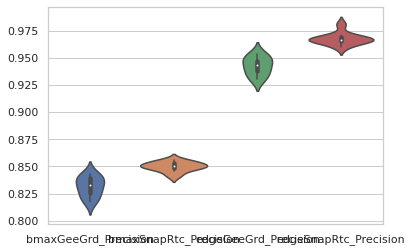

In [15]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.violinplot(data=final_pre_stack)

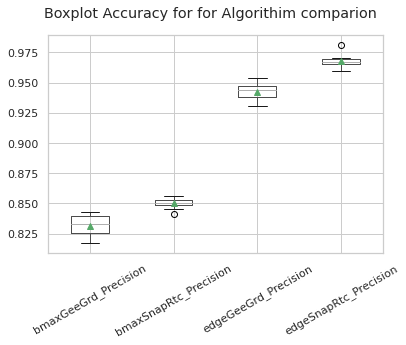

In [16]:
plt.figure()
plt.suptitle("Boxplot Accuracy for for Algorithim comparion")
ax = plt.gca()

final_pre_stack.boxplot(showmeans=True)
# Rotate x axis text values
for tick in ax.get_xticklabels():
    tick.set_rotation(30)

# Data Flip with subset

### bmaxGeeGrd_results

In [0]:
bmaxGeeGrd_results = confusion_matrix(actual_1, bmaxGeeGrd_1)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")

bmaxGeeGrd_results = confusion_matrix(actual_2, bmaxGeeGrd_2)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")

bmaxGeeGrd_results = confusion_matrix(actual_3, bmaxGeeGrd_3)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")

bmaxGeeGrd_results = confusion_matrix(actual_4, bmaxGeeGrd_4)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")

bmaxGeeGrd_results = confusion_matrix(actual_5, bmaxGeeGrd_5)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")
bmaxGeeGrd_results = confusion_matrix(actual_6, bmaxGeeGrd_6)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")

bmaxGeeGrd_results = confusion_matrix(actual_7, bmaxGeeGrd_7)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")

bmaxGeeGrd_results = confusion_matrix(actual_8, bmaxGeeGrd_8)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")

bmaxGeeGrd_results = confusion_matrix(actual_9, bmaxGeeGrd_9)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")

bmaxGeeGrd_results = confusion_matrix(actual_10, bmaxGeeGrd_10)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")

bmaxGeeGrd_results [[1456   88]
 [  66  423]]
final_bmaxGeeGrd_results [[ 423   88]
 [  66 1456]]
######
bmaxGeeGrd_results [[1433   88]
 [  66  446]]
final_bmaxGeeGrd_results [[ 446   88]
 [  66 1433]]
######
bmaxGeeGrd_results [[1447   86]
 [  68  432]]
final_bmaxGeeGrd_results [[ 432   86]
 [  68 1447]]
######
bmaxGeeGrd_results [[1410   97]
 [  79  447]]
final_bmaxGeeGrd_results [[ 447   97]
 [  79 1410]]
######
bmaxGeeGrd_results [[1426   93]
 [  71  443]]
final_bmaxGeeGrd_results [[ 443   93]
 [  71 1426]]
######
bmaxGeeGrd_results [[1425   89]
 [  66  453]]
final_bmaxGeeGrd_results [[ 453   89]
 [  66 1425]]
######
bmaxGeeGrd_results [[1416   90]
 [  71  456]]
final_bmaxGeeGrd_results [[ 456   90]
 [  71 1416]]
######
bmaxGeeGrd_results [[1427   85]
 [  79  442]]
final_bmaxGeeGrd_results [[ 442   85]
 [  79 1427]]
######
bmaxGeeGrd_results [[1434   80]
 [  84  435]]
final_bmaxGeeGrd_results [[ 435   80]
 [  84 1434]]
######
bmaxGeeGrd_results [[1434   90]
 [  73  436]]
final_bma

### bmaxSnapRtc_results

In [0]:
bmaxSnapRtc_results = confusion_matrix(actual_1, bmaxSnapRtc_1)
transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")

bmaxSnapRtc_results = confusion_matrix(actual_2, bmaxSnapRtc_2)
transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")
bmaxSnapRtc_results = confusion_matrix(actual_3, bmaxSnapRtc_3)
transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")
bmaxSnapRtc_results = confusion_matrix(actual_4, bmaxSnapRtc_4)
transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")
bmaxSnapRtc_results = confusion_matrix(actual_5, bmaxSnapRtc_5)
transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")
bmaxSnapRtc_results = confusion_matrix(actual_6, bmaxSnapRtc_6)
transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")
bmaxSnapRtc_results = confusion_matrix(actual_7, bmaxSnapRtc_7)
transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")
bmaxSnapRtc_results = confusion_matrix(actual_8, bmaxSnapRtc_8)
transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")

bmaxSnapRtc_results = confusion_matrix(actual_9, bmaxSnapRtc_9)
transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")
bmaxSnapRtc_results = confusion_matrix(actual_10, bmaxSnapRtc_10)
transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")

final_bmaxSnapRtc_results [[ 406   76]
 [  83 1468]]
######
final_bmaxSnapRtc_results [[ 431   75]
 [  81 1446]]
######
final_bmaxSnapRtc_results [[ 415   73]
 [  85 1460]]
######
final_bmaxSnapRtc_results [[ 436   79]
 [  90 1428]]
######
final_bmaxSnapRtc_results [[ 438   78]
 [  76 1441]]
######
final_bmaxSnapRtc_results [[ 438   74]
 [  81 1440]]
######
final_bmaxSnapRtc_results [[ 441   78]
 [  86 1428]]
######
final_bmaxSnapRtc_results [[ 434   77]
 [  87 1435]]
######
final_bmaxSnapRtc_results [[ 422   78]
 [  97 1436]]
######
final_bmaxSnapRtc_results [[ 421   81]
 [  88 1443]]
######


### edgeGeeGrd_results


In [0]:
edgeGeeGrd_results = confusion_matrix(actual_1, edgeGeeGrd_1)
transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

edgeGeeGrd_results = confusion_matrix(actual_2, edgeGeeGrd_2)
transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

edgeGeeGrd_results = confusion_matrix(actual_3, edgeGeeGrd_3)
transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

edgeGeeGrd_results = confusion_matrix(actual_4, edgeGeeGrd_4)
transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

edgeGeeGrd_results = confusion_matrix(actual_5, edgeGeeGrd_5)
transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

edgeGeeGrd_results = confusion_matrix(actual_6, edgeGeeGrd_6)
transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

edgeGeeGrd_results = confusion_matrix(actual_7, edgeGeeGrd_7)
transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

edgeGeeGrd_results = confusion_matrix(actual_8, edgeGeeGrd_8)
transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

edgeGeeGrd_results = confusion_matrix(actual_9, edgeGeeGrd_9)
transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

edgeGeeGrd_results = confusion_matrix(actual_10, edgeGeeGrd_10)
transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

final_edgeGeeGrd_results [[ 314   19]
 [ 175 1525]]
######
final_edgeGeeGrd_results [[ 332   21]
 [ 180 1500]]
######
final_edgeGeeGrd_results [[ 325   15]
 [ 175 1518]]
######
final_edgeGeeGrd_results [[ 343   19]
 [ 183 1488]]
######
final_edgeGeeGrd_results [[ 335   18]
 [ 179 1501]]
######
final_edgeGeeGrd_results [[ 339   19]
 [ 180 1495]]
######
final_edgeGeeGrd_results [[ 340   19]
 [ 187 1487]]
######
final_edgeGeeGrd_results [[ 337   21]
 [ 184 1491]]
######
final_edgeGeeGrd_results [[ 324   20]
 [ 195 1494]]
######
final_edgeGeeGrd_results [[ 323   22]
 [ 186 1502]]
######


### edgeSnapRtc_results

In [0]:
edgeSnapRtc_results = confusion_matrix(actual_1, edgeSnapRtc_1)
transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)\

print("######")
edgeSnapRtc_results = confusion_matrix(actual_2, edgeSnapRtc_2)
transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)

print("######")
edgeSnapRtc_results = confusion_matrix(actual_3, edgeSnapRtc_3)
transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)\

print("######")
edgeSnapRtc_results = confusion_matrix(actual_4, edgeSnapRtc_4)
transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)

print("######")
edgeSnapRtc_results = confusion_matrix(actual_5, edgeSnapRtc_5)
transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)\

print("######")
edgeSnapRtc_results = confusion_matrix(actual_6, edgeSnapRtc_6)
transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)

print("######")
edgeSnapRtc_results = confusion_matrix(actual_7, edgeSnapRtc_7)
transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)\

print("######")
edgeSnapRtc_results = confusion_matrix(actual_8, edgeSnapRtc_8)
transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)

print("######")
edgeSnapRtc_results = confusion_matrix(actual_9, edgeSnapRtc_9)
transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)\

print("######")
edgeSnapRtc_results = confusion_matrix(actual_10, edgeSnapRtc_10)
transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)

final_edgeSnapRtc_results [[ 382   12]
 [ 107 1532]]
######
final_edgeSnapRtc_results [[ 411   14]
 [ 101 1507]]
######
final_edgeSnapRtc_results [[ 395   11]
 [ 105 1522]]
######
final_edgeSnapRtc_results [[ 421   14]
 [ 105 1493]]
######
final_edgeSnapRtc_results [[ 413   11]
 [ 101 1508]]
######
final_edgeSnapRtc_results [[ 415   12]
 [ 104 1502]]
######
final_edgeSnapRtc_results [[ 419   13]
 [ 108 1493]]
######
final_edgeSnapRtc_results [[ 411   15]
 [ 110 1497]]
######
final_edgeSnapRtc_results [[ 397   14]
 [ 122 1500]]
######
final_edgeSnapRtc_results [[ 396   17]
 [ 113 1507]]


# Final Summary Stat Table for all Subsmaples and Stats

In [17]:
#displays a table of indexed by stat method/algorithm
# runs = ["bmaxGeeGrd_1", "bmaxGeeGrd_2", "bmaxGeeGrd_3", "bmaxGeeGrd_4", "bmaxGeeGrd_5" , "bmaxGeeGrd_6", "bmaxGeeGrd_7", "bmaxGeeGrd_8", "bmaxGeeGrd_9", "bmaxGeeGrd_10"],
stat_dict = {"bmaxGeeGrd_Accuracy" : [accuracy_score(actual_1, bmaxGeeGrd_1),
           accuracy_score(actual_2, bmaxGeeGrd_2),
           accuracy_score(actual_3, bmaxGeeGrd_3),
           accuracy_score(actual_4, bmaxGeeGrd_4), 
           accuracy_score(actual_5, bmaxGeeGrd_5), 
           accuracy_score(actual_6, bmaxGeeGrd_6), 
           accuracy_score(actual_7, bmaxGeeGrd_7), 
           accuracy_score(actual_8, bmaxGeeGrd_8), 
           accuracy_score(actual_9, bmaxGeeGrd_9), 
           accuracy_score(actual_10, bmaxGeeGrd_10)],
           'bmaxGeeGrd_Precision':  [precision_score(actual_1, bmaxGeeGrd_1),
           precision_score(actual_2, bmaxGeeGrd_2),
           precision_score(actual_3, bmaxGeeGrd_3),
           precision_score(actual_4, bmaxGeeGrd_4), 
           precision_score(actual_5, bmaxGeeGrd_5), 
           precision_score(actual_6, bmaxGeeGrd_6), 
           precision_score(actual_7, bmaxGeeGrd_7), 
           precision_score(actual_8, bmaxGeeGrd_8), 
           precision_score(actual_9, bmaxGeeGrd_9), 
           precision_score(actual_10, bmaxGeeGrd_10)],
            'bmaxGeeGrd_Cohen_Kappa':  [cohen_kappa_score(actual_1, bmaxGeeGrd_1),
           cohen_kappa_score(actual_2, bmaxGeeGrd_2),
           cohen_kappa_score(actual_3, bmaxGeeGrd_3),
           cohen_kappa_score(actual_4, bmaxGeeGrd_4), 
           cohen_kappa_score(actual_5, bmaxGeeGrd_5), 
           cohen_kappa_score(actual_6, bmaxGeeGrd_6), 
           cohen_kappa_score(actual_7, bmaxGeeGrd_7), 
           cohen_kappa_score(actual_8, bmaxGeeGrd_8), 
           cohen_kappa_score(actual_9, bmaxGeeGrd_9), 
           cohen_kappa_score(actual_10, bmaxGeeGrd_10)],
           'bmaxGeeGrd_ROC_AUC':  [roc_auc_score(actual_1, bmaxGeeGrd_1),
           roc_auc_score(actual_2, bmaxGeeGrd_2),
           roc_auc_score(actual_3, bmaxGeeGrd_3),
           roc_auc_score(actual_4, bmaxGeeGrd_4), 
           roc_auc_score(actual_5, bmaxGeeGrd_5), 
           roc_auc_score(actual_6, bmaxGeeGrd_6), 
           roc_auc_score(actual_7, bmaxGeeGrd_7), 
           roc_auc_score(actual_8, bmaxGeeGrd_8), 
           roc_auc_score(actual_9, bmaxGeeGrd_9), 
           roc_auc_score(actual_10, bmaxGeeGrd_10)],
           'bmaxGeeGrd_F1_Score':  [f1_score(actual_1, bmaxGeeGrd_1),
           f1_score(actual_2, bmaxGeeGrd_2),
           f1_score(actual_3, bmaxGeeGrd_3),
           f1_score(actual_4, bmaxGeeGrd_4), 
           f1_score(actual_5, bmaxGeeGrd_5), 
           f1_score(actual_6, bmaxGeeGrd_6), 
           f1_score(actual_7, bmaxGeeGrd_7), 
           f1_score(actual_8, bmaxGeeGrd_8), 
           f1_score(actual_9, bmaxGeeGrd_9), 
           f1_score(actual_10, bmaxGeeGrd_10)],
           }


stat_dict_output_df = pd.DataFrame(stat_dict).transpose()

summary_ave_data = stat_dict_output_df.copy()
summary_ave_data['average'] = summary_ave_data.mean(axis=1)
summary_ave_data['std'] = summary_ave_data.std(axis=1)
summary_ave_data['variance'] = summary_ave_data.var(axis=1)
summary_ave_data



,0,1,2,3,4,5,6,7,8,9,average,std,variance
bmaxGeeGrd_Accuracy,0.914904,0.918347,0.918839,0.928185,0.920807,0.917364,0.916380,0.924250,0.918347,0.922282,0.919970,0.003791,0.069962
bmaxGeeGrd_Precision,0.825427,0.819887,0.840824,0.843212,0.832727,0.826493,0.817121,0.840149,0.832423,0.836576,0.831484,0.008548,0.056502
bmaxGeeGrd_Cohen_Kappa,0.776913,0.785573,0.789836,0.809938,0.796680,0.784852,0.776078,0.803266,0.790725,0.792963,0.790682,0.010169,0.050861
bmaxGeeGrd_ROC_AUC,0.891189,0.899512,0.896128,0.909801,0.903991,0.896913,0.892808,0.906195,0.899694,0.899118,0.899535,0.005506,0.066635
bmaxGeeGrd_F1_Score,0.834132,0.840385,0.844779,0.857977,0.850511,0.840607,0.831683,0.854442,0.846296,0.844794,0.844561,0.007898,0.058390
